In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
def Gradient_Descent(s_X_train,Y):
    theta=np.zeros([7,1])
    tolerance = 0.000001
    current_cost = 10000
    iterations=10
    M=len(s_X_train)
    learinig_rate=0.3
    cost_histore=[]
    for i in range(iterations):
       if current_cost < tolerance:
         break
       else:
          Y_pred= np.dot(s_X_train,theta)
          error=Y_pred-Y
          gradient= np.dot(s_X_train.transpose(),error)/M
          theta = theta - (learinig_rate* gradient)
          current_cost= np.sum(np.square(Y_pred -Y))/(2*M)
          cost_histore.append(current_cost)

    return cost_histore
    


In [ ]:
# Date Reading
data = pd.read_csv('/content/Fish.csv')

# Apply LabelEncoder
Label_Encoder=LabelEncoder()
data['Species']=Label_Encoder.fit_transform(data['Species'])

# Get Inputs'Features and True Outputs
x = data.drop(['Weight'], axis=1)
Y= data['Weight'].values.reshape(-1, 1)

#Convert X, to Numpy representation
X=x.values

#Apply StandardScaler
scaler = StandardScaler()
s_X_train = scaler.fit_transform(X)

new_x = np.c_[np.ones((len(s_X_train),1)),s_X_train]
cost=Gradient_Descent(new_x,Y)

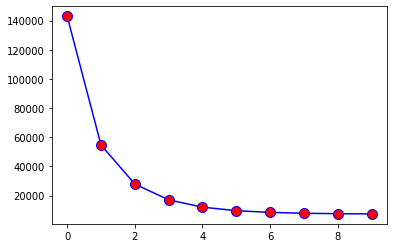

In [ ]:
#plot to verify cost function decreases
iterations=10
plt.plot(range(iterations),cost, marker='o',color='blue',markerfacecolor='red',markersize=10)
